In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Salt Budget Analysis

## Pull in Model Results 

In [57]:
Model = "C:/Users/Lizmot34/Desktop/RBF-PSG-0G-P/EM_RBF_v03_Ani/EM_RBF_v03_Ani/SALINITY/salt.output.budget_watershed.txt"

In [58]:
GraphName = "Salt Budget PS0G"

In [59]:
FigurePath = 'C:/Users/Lizmot34/Desktop/FinishedFigures/05172022_Jupyter'

In [60]:
FigureSuffix = 'SaltBudget'

In [61]:
Mod = pd.read_csv(Model, skiprows = 3, delim_whitespace = True)

Drop data till end of warm up

In [62]:
Mod.drop(Mod.index[0:1826],0,inplace=True)
datestart = np.array('1992-01-01', dtype=np.datetime64)
dates = datestart + np.arange(7305)
years = Mod.year

In [63]:
print(Mod)

      year  day         soil  runoff  erosion     lateral  irrig  precdissol  \
1826  1992    1  414279970.0     0.0      0.0 -7567.19870    0.0   294821.91   
1827  1992    2  413855360.0     0.0      0.0  -960.66730    0.0   283163.47   
1828  1992    3  413929060.0     0.0      0.0 -1186.35380    0.0   275077.56   
1829  1992    4  414034940.0     0.0      0.0  -307.08978    0.0   271823.69   
1830  1992    5  414083040.0     0.0      0.0 -1495.39040    0.0   435882.81   
...    ...  ...          ...     ...      ...         ...    ...         ...   
9126  2011  361  405071840.0     0.0      0.0 -1189.09060    0.0   299077.38   
9127  2011  362  405298940.0     0.0      0.0 -1179.11240    0.0   270594.72   
9128  2011  363  405510180.0     0.0      0.0 -1180.57150    0.0   253558.88   
9129  2011  364  405707580.0     0.0      0.0  -678.86963    0.0   233781.97   
9130  2011  365  405895330.0     0.0      0.0  -663.52332    0.0   221068.80   

        leaching   APEXgwsw    APEXswgw

Be sure to change perc-dissol in text file to percdissol

In [64]:
Salt_Soil = Mod.soil
Salt_Runoff = Mod.runoff
Salt_Erosion = Mod.erosion
Salt_Lateral = Mod.lateral
Salt_Irrigation = Mod.irrig
Salt_PrecDiss = Mod.precdissol
Salt_Leaching = Mod.leaching
Salt_APEXgwsw = Mod.APEXgwsw
Salt_APEXswgw = Mod.APEXswgw
Salt_Aquifer = Mod.aquifer
Salt_recharge = Mod.recharge
Salt_RT3Dgwsw = Mod.RT3Dgwsw
Salt_RT3Dswgw = Mod.RT3Dswgw
Salt_Boundary = Mod.boundary

#### Graph of All

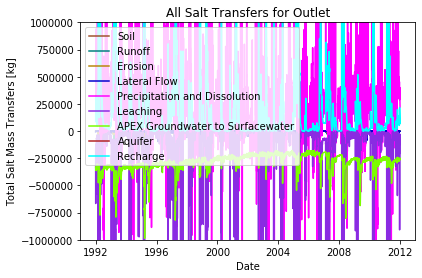

In [89]:
fig, ax = plt.subplots()
ax.plot(dates, Salt_Soil, color = 'sienna', label = "Soil")
ax.plot(dates, Salt_Runoff, color = 'teal', label = "Runoff")
ax.plot(dates, Salt_Erosion, color = 'darkgoldenrod', label = "Erosion")
ax.plot(dates, Salt_Lateral, color = 'mediumblue', label = "Lateral Flow")
ax.plot(dates, Salt_PrecDiss, color = 'magenta', label = "Precipitation and Dissolution")
ax.plot(dates, Salt_Leaching, color = 'blueviolet', label = "Leaching")
ax.plot(dates, Salt_APEXgwsw, color = 'lawngreen', label = "APEX Groundwater to Surfacewater")
ax.plot(dates, Salt_Aquifer, color = 'firebrick', label = "Aquifer")
ax.plot(dates, Salt_recharge, color = 'cyan', label = "Recharge")
ax.set_xlabel('Date')
ax.set_ylabel("Total Salt Mass Transfers [kg]")
ax.set_ylim((-1000000,1000000))
ax.set_title("All Salt Transfers for Outlet")
ax.legend()

#### Graph of Chemical Processes 

Note that the graph produced is auto-scaled currently and shows the kg at 1e7

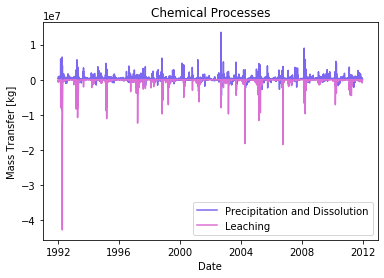

In [84]:
fig, ax = plt.subplots()
ax.plot(dates, Salt_PrecDiss, color = 'mediumslateblue', label ="Precipitation and Dissolution")
ax.plot(dates, Salt_Leaching, color = 'orchid', label = "Leaching")
ax.set_xlabel('Date')
ax.set_ylabel('Mass Transfer [kg]')
ax.set_title("Chemical Processes")
ax.legend()

#### APEX GWSW and SWGW 

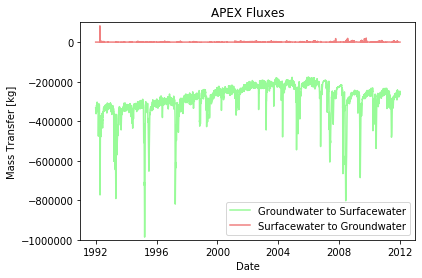

In [96]:
fig, ax = plt.subplots()
ax.plot(dates, Salt_APEXgwsw, color = 'palegreen', label = "Groundwater to Surfacewater")
ax.plot(dates, Salt_APEXswgw, color = 'lightcoral', label = "Surfacewater to Groundwater")
ax.set_xlabel('Date')
ax.set_ylabel('Mass Transfer [kg]')
ax.set_title("APEX Fluxes")
ax.set_ylim((-1000000,100000))
ax.legend()

#### RT3D GWSW and SWGW

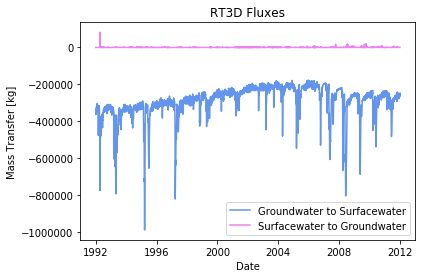

In [98]:
fig, ax = plt.subplots()
ax.plot(dates, Salt_RT3Dgwsw, color = 'cornflowerblue', label = "Groundwater to Surfacewater")
ax.plot(dates, Salt_RT3Dswgw, color = 'violet', label = "Surfacewater to Groundwater")
ax.set_xlabel('Date')
ax.set_ylabel('Mass Transfer [kg]')
ax.set_title("RT3D Fluxes")
ax.legend()

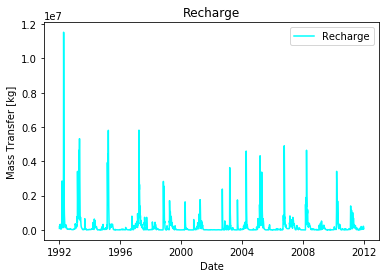

In [108]:
fig, ax = plt.subplots()
ax.plot(dates, Salt_recharge, color = 'cyan', label = "Recharge")
ax.set_xlabel('Date')
ax.set_ylabel('Mass Transfer [kg]')
ax.set_title("Recharge")
ax.legend()

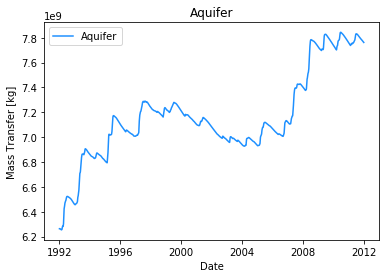

In [101]:
fig, ax = plt.subplots()
ax.plot(dates, Salt_Aquifer, color = 'dodgerblue', label = "Aquifer")
ax.set_xlabel('Date')
ax.set_ylabel('Mass Transfer [kg]')
ax.set_title("Aquifer")
ax.legend()

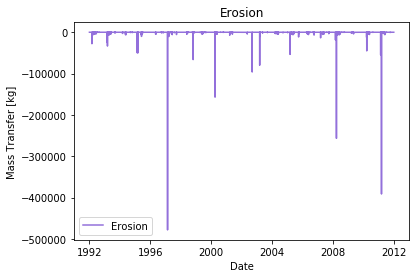

In [105]:
fig, ax = plt.subplots()
ax.plot(dates, Salt_Erosion, color = 'mediumpurple', label = "Erosion")
ax.set_xlabel('Date')
ax.set_ylabel('Mass Transfer [kg]')
ax.set_title("Erosion")
ax.legend()

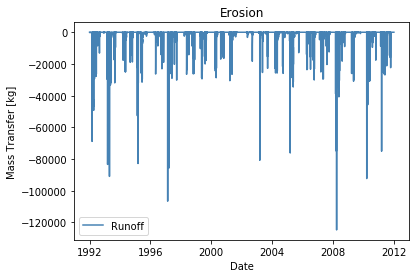

In [106]:
fig, ax = plt.subplots()
ax.plot(dates, Salt_Runoff, color = 'steelblue', label = "Runoff")
ax.set_xlabel('Date')
ax.set_ylabel('Mass Transfer [kg]')
ax.set_title("Erosion")
ax.legend()

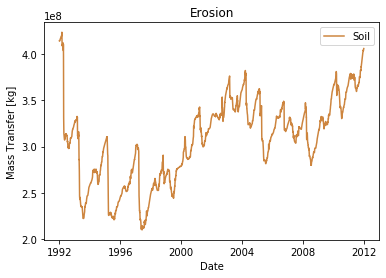

In [107]:
fig, ax = plt.subplots()
ax.plot(dates, Salt_Soil, color = 'peru', label = "Soil")
ax.set_xlabel('Date')
ax.set_ylabel('Mass Transfer [kg]')
ax.set_title("Erosion")
ax.legend()

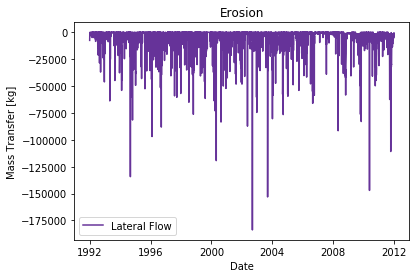

In [109]:
fig, ax = plt.subplots()
ax.plot(dates, Salt_Lateral, color = 'rebeccapurple', label = "Lateral Flow")
ax.set_xlabel('Date')
ax.set_ylabel('Mass Transfer [kg]')
ax.set_title("Erosion")
ax.legend()